# LAB 8: Neural networks

The purpose of this lab work is to study the training and optimisaton of feed-forward neural networks in Keras. Overfitting is prevented with early stopping regularisation (as seen for linear models), but other regularisation methods inspired from Lasso, Ridge, Elastic net linear algos that we studied so far, will be introduced in the next sessions.  

## Tasks 
1. Study and run (cell by cell) the code below which illustrates the training and evaluation, and also optimisation of neural networks.  

2. Select the X1, X2, X3, and Y variables from the dataset provided for the coursework, and predict the outocme Y with neural networks as inspired by some of the simpler examples provided in this lab.  

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


2022-03-17 14:07:34.162177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-17 14:07:34.162210: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Perceptrons

In [3]:
# Fitting a perceptron on Iris dataset, as done for logistic regression.
# We have 2 classes: 0 (Iris Setosa) and 1 (Not-Iris Setosa).

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# make a prediction for the plant having these sizes: petal length, petal width
y_pred = per_clf.predict([[2, 0.5]])

/tmp/ipykernel_732109/706410525.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [7]:
# We can see it's Setosa (class 1)
y_pred

array([1])

Saving figure perceptron_iris_plot


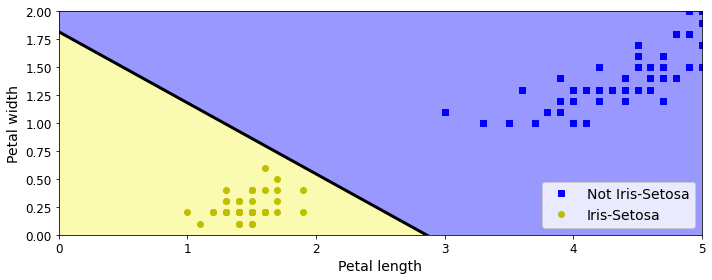

In [8]:

# This is just o represent the predictions with this model and the separation line

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [9]:
# Defining and plotting some of the most common actvation functions 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


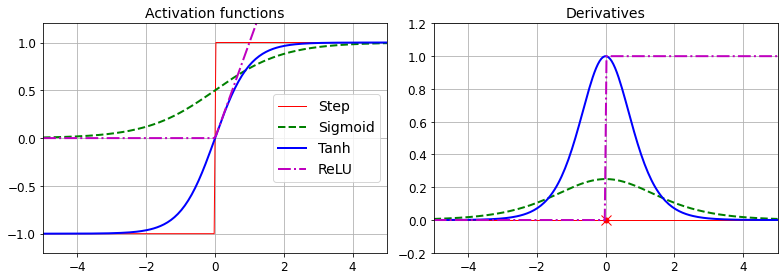

In [14]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# Building an Image Classifier using Fashion MNIST dataset

First let's import TensorFlow and Keras.

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
tf.__version__

'2.7.0'

In [17]:
keras.__version__

'2.7.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [19]:
X_train_full.shape

(60000, 28, 28)

In [20]:
28*28

784

Each pixel intensity is represented as a byte (0 to 255):

In [21]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [66]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [67]:
len(X_valid[0].flatten())

784

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

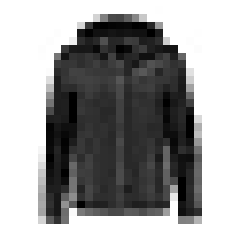

In [68]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [18]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [19]:
X_valid.shape

(5000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


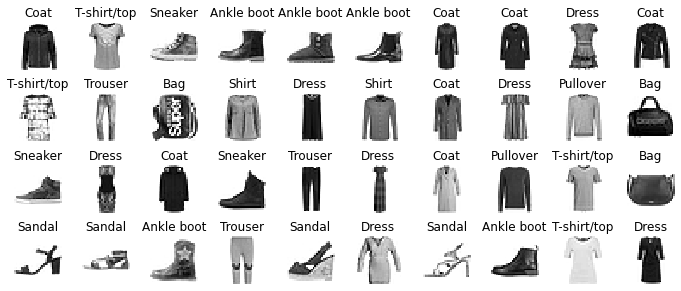

In [21]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [39]:
# Define a nerual net with Sequential API 

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [40]:
# Clear session

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.layers

In [43]:
# Let's check the model's details and graphcal representation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


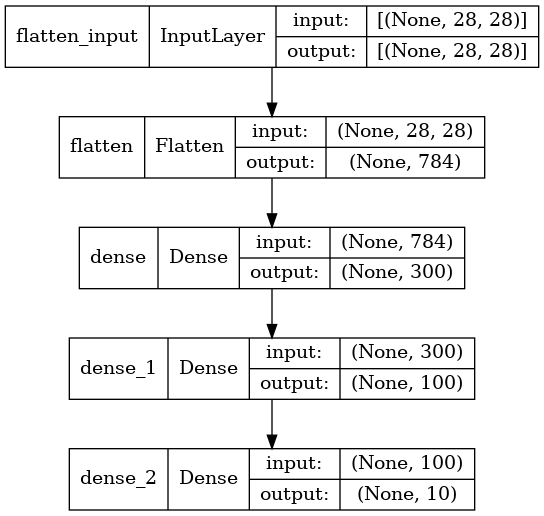

In [44]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [45]:
# Layers have names

hidden1 = model.layers[1]
hidden1.name

'dense'

In [46]:
model.get_layer(hidden1.name) is hidden1

True

In [47]:
# Let's get the weights of hidden 1 layer (of connections entering the layer)
# Notice these wights are initialised with random numbers .
# When we fit the model to the data, these weights will be updated step by step with Gradient Descent

weights, biases = hidden1.get_weights()

In [48]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [49]:
# there are 784 x 300 weights

weights.shape

(784, 300)

In [50]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
# and 300 biases

biases.shape

(300,)

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [53]:
# Now fit the model in 30 epochs

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

2022-03-14 12:30:39.007397: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4351 - val_accuracy: 0.8530
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5328 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4125 - accuracy: 0.8565 - val_loss: 0.3917 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3749 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3706 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8712 - val_loss: 0.3617 - val_accuracy:


KeyboardInterrupt



In [ ]:
# parameters of the training

history.params

In [ ]:
print(history.epoch)

In [ ]:
# history is a dictionary containing performance vectors with their names as keys

history.history.keys()

In [ ]:
# Let's plot the leraning curves

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

In [41]:
# Make predictions on 3 instances.
# Observe each row provides the 10 probabilities for the 10 classes (they add up to 1).
# 1st row shows that the class 9 last one) has highest probability 96%, so that's the predicted class.

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [42]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [43]:
# Get the class names for those predictions 

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


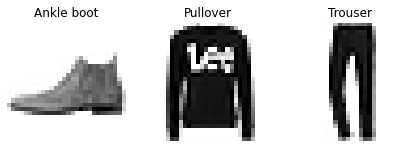

In [45]:
# Let's disply the 3 instances.
# We see that indeed, what we predicted as classes ('Ankle boot', 'Pullover', 'Trouser'), 
# are correct.

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
# Let's define and fit a regression neural net model with 1 hidden layer of 30 neurons 
# in which we use the ReLU function. We use Stochastic Gradient Descent (SGD) for 20 epochs,
# with a learning rate = 0.001

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 877us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 904us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 848us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 830us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 819us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 793us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 799us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 861us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 818us/step - loss: 0.4875 

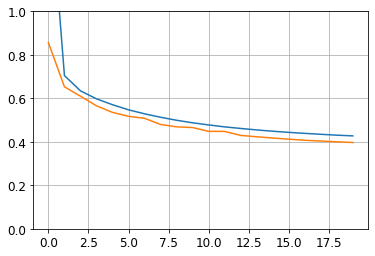

In [49]:
# Plot the learning curves

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [53]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [54]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 947us/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 715us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 699us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 695us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 732us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 731us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 731us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 733us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 688us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 690us/step - loss: 0.465

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [57]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 992us/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 775us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 776us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 775us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 773us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 827us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 766us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 775us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 775us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 733us/step - loss: 0.464

Adding an auxiliary output for regularization:

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
# Define a model with the Functional API.
# Notice the model has 1 main output, and 1 auxiliary output, couting to total loss with .9 and .1 weights.
# The loss function is MSE for both output nodes.
# Notice agan the optimizer used to update (improve iteratively) the model is SGD, with 
# constant learning rate 0.001.
# Auxiliary output here may help making sure that part of the model learn and capture pattern from data. 

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [60]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 861us/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 861us/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 831us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 861us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - 

In [62]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 676us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# Saving and Restoring models

In [63]:
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [65]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 946us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 745us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 718us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 661us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 645us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 703us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 716us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 732us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 689us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 480us/step - loss: 0.438

In [66]:
# Save the trained model in this file in HDF5 format (here extension .h5)

model.save("my_keras_model.h5")

In [67]:
# Retrieve model from file

model = keras.models.load_model("my_keras_model.h5")

In [68]:
model.predict(X_new)

array([[0.5400237],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [69]:
# Saving model's weights

model.save_weights("my_keras_weights.ckpt")

In [70]:
# Loading model's weights

model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

Callbacks are useful for multiple things, but mainly for early stopping to prevent overfitting of the model. 

In [71]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [73]:
# We define a callback which will save the best model so far on the validation set, in a file my_keras_model.h5.
# Once the number of iterations is finished, we can roll back the model to the best one found.

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 731us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 853us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 829us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 728us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 837us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 820us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 482us/step - loss: 0.4382


In [74]:

# Here we use another callback - for early stopping. 
# This will make the training stop if the loss doesn't significantly 
# improve for 10 epochs (see patience=10)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 692us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 727us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 733us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 788us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 718us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 778us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 728us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 948us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 731us/step - los

Epoch 80/100
363/363 [==============================] - 0s 699us/step - loss: 0.3329 - val_loss: 0.3354
Epoch 81/100
363/363 [==============================] - 0s 742us/step - loss: 0.3324 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 725us/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 699us/step - loss: 0.3317 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 681us/step - loss: 0.3312 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 656us/step - loss: 0.3310 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 958us/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 828us/step - loss: 0.3305 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 0s 699us/step - loss: 0.3299 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 0s 688us

In [75]:
# You can customize your own callbacks as ilustrated here. 
# The new callback prints the ratio between the validation loss and training loss.
# When this ratio starts to increase significantly over 1, it is a sign that the mdoel overfits,
# because the training loss is significantly smaller than validaton loss.  

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [76]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

304/363 [========================>.....] - ETA: 0s - loss: 0.3296
val/train: 1.08
363/363 [==============================] - 0s 775us/step - loss: 0.3302 - val_loss: 0.3556


# TensorBoard 


We now set the TensorBoard, which is a useful tool to monitor the model training and performance. It works by storing the details of the processing in log files in a specially created folder, and using those log files to display charts about the model training/ tuning. 

In [77]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [78]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_03_12-13_13_11'

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
# We use a TensorBoard callback to store details on performances of the model during its tuning

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 7.8215WARNING:tensorflow:From C:\Users\daniel\.conda\envs\DM\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 990us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 942us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 863us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [=====================

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [82]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 5052), started 0:37:19 ago. (Use '!kill 5052' to kill it.)

In [83]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_03_12-13_13_22'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5530 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 899us/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 908us/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 987us/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 899us/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 908us/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 946us/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 904us/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 905us/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 903us/step - lo

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [87]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

This illustrated the process of wrapping the neural net model in sklearn, to be able to tune it in the same way as for other algos in sklearn.

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
# Define a function producing a neural net model

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
# Wrap the mdoel in sklearn

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [91]:
# Fit he model with early stopping.
# Note that surplus parameter values in the "fit" method will be used by the underlying Keras/
# nerual net model.

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 943us/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 732us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 689us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 668us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 709us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 732us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 689us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 731us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 646us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 638us/step - 

In [92]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 577us/step - loss: 0.3409


In [93]:
y_pred = keras_reg.predict(X_new)

In [94]:
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
# Tuning the neural net model in a cross validation.
# It can take up to 5 min or so. 

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=2, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=80,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Epoch 1/80
182/182 [==============================] - 0s 1ms/step - loss: 0.9173 - val_loss: 0.8308
Epoch 2/80
182/182 [==============================] - 0s 903us/step - loss: 0.5106 - val_loss: 0.5293
Epoch 3/80
182/182 [==============================] - 0s 979us/step - loss: 0.4644 - val_loss: 0.4571
Epoch 4/80
182/182 [==============================] - 0s 807us/step - loss: 0.4456 - val_loss: 0.4224
Epoch 5/80
182/182 [==============================] - 0s 757us/step - loss: 0.4395 - val_loss: 0.4177
Epoch 6/80
182/182 [==============================] - 0s 772us/step - loss: 0.4368 - val_loss: 0.4031
Epoch 7/80
182/182 [==============================] - 0s 859us/step - loss: 0.4365 - val_loss: 0.4000
Epoch 8/80
182/182 [==============================] - 0s 859us/step - loss: 0.4331 - val_loss: 0.4202
Epoch 9/80
182/182 [==============================] - 0s 858us/step - loss: 0.4302 - val_loss: 0.4109
Epoch 10/80
182/182 [==

Epoch 14/80
182/182 [==============================] - 0s 859us/step - loss: 0.3554 - val_loss: 0.3902
Epoch 15/80
182/182 [==============================] - 0s 860us/step - loss: 0.3522 - val_loss: 0.3604
Epoch 16/80
182/182 [==============================] - 0s 860us/step - loss: 0.3482 - val_loss: 0.3605
Epoch 17/80
182/182 [==============================] - 0s 944us/step - loss: 0.3457 - val_loss: 0.3789
Epoch 18/80
182/182 [==============================] - 0s 967us/step - loss: 0.3448 - val_loss: 0.3301
Epoch 19/80
182/182 [==============================] - 0s 834us/step - loss: 0.3434 - val_loss: 0.3941
Epoch 20/80
182/182 [==============================] - 0s 946us/step - loss: 0.3408 - val_loss: 0.3429
Epoch 21/80
182/182 [==============================] - 0s 970us/step - loss: 0.3362 - val_loss: 0.3705
Epoch 22/80
182/182 [==============================] - 0s 894us/step - loss: 0.3340 - val_loss: 0.3705
Epoch 23/80
182/182 [==============================] - 0s 882us/step - lo

182/182 [==============================] - 0s 859us/step - loss: 0.5511 - val_loss: 0.5392
Epoch 35/80
182/182 [==============================] - 0s 962us/step - loss: 0.5471 - val_loss: 0.5342
Epoch 36/80
182/182 [==============================] - 0s 927us/step - loss: 0.5432 - val_loss: 0.5378
Epoch 37/80
182/182 [==============================] - 0s 859us/step - loss: 0.5395 - val_loss: 0.5294
Epoch 38/80
182/182 [==============================] - 0s 965us/step - loss: 0.5359 - val_loss: 0.5266
Epoch 39/80
182/182 [==============================] - 0s 839us/step - loss: 0.5324 - val_loss: 0.5288
Epoch 40/80
182/182 [==============================] - 0s 859us/step - loss: 0.5291 - val_loss: 0.5268
Epoch 41/80
182/182 [==============================] - 0s 878us/step - loss: 0.5258 - val_loss: 0.5279
Epoch 42/80
182/182 [==============================] - 0s 925us/step - loss: 0.5227 - val_loss: 0.5189
Epoch 43/80
182/182 [==============================] - 0s 859us/step - loss: 0.5196 -

Epoch 16/80
182/182 [==============================] - 0s 1ms/step - loss: 0.4093 - val_loss: 0.3921
Epoch 17/80
182/182 [==============================] - 0s 860us/step - loss: 0.4041 - val_loss: 0.5024
Epoch 18/80
182/182 [==============================] - 0s 943us/step - loss: 0.4016 - val_loss: 0.5008
Epoch 19/80
182/182 [==============================] - 0s 944us/step - loss: 0.4001 - val_loss: 1.0808
Epoch 20/80
182/182 [==============================] - 0s 946us/step - loss: 0.4087 - val_loss: 0.8791
Epoch 21/80
182/182 [==============================] - 0s 942us/step - loss: 0.4022 - val_loss: 1.3800
Epoch 22/80
182/182 [==============================] - 0s 1ms/step - loss: 0.4067 - val_loss: 0.5383
Epoch 23/80
182/182 [==============================] - 0s 1ms/step - loss: 0.3887 - val_loss: 0.6517
Epoch 24/80
182/182 [==============================] - 0s 944us/step - loss: 0.3877 - val_loss: 0.3938
Epoch 25/80
182/182 [==============================] - 0s 515us/step - loss: 0.

Epoch 5/80
182/182 [==============================] - 0s 812us/step - loss: 0.5970 - val_loss: 0.5804
Epoch 6/80
182/182 [==============================] - 0s 945us/step - loss: 0.5703 - val_loss: 0.5417
Epoch 7/80
182/182 [==============================] - 0s 858us/step - loss: 0.5475 - val_loss: 0.5416
Epoch 8/80
182/182 [==============================] - 0s 809us/step - loss: 0.5274 - val_loss: 0.5183
Epoch 9/80
182/182 [==============================] - 0s 871us/step - loss: 0.5087 - val_loss: 0.4888
Epoch 10/80
182/182 [==============================] - 0s 933us/step - loss: 0.4924 - val_loss: 0.4783
Epoch 11/80
182/182 [==============================] - 0s 858us/step - loss: 0.4786 - val_loss: 0.4834
Epoch 12/80
182/182 [==============================] - 0s 925us/step - loss: 0.4665 - val_loss: 0.4594
Epoch 13/80
182/182 [==============================] - 0s 875us/step - loss: 0.4566 - val_loss: 0.4575
Epoch 14/80
182/182 [==============================] - 0s 945us/step - loss: 0

182/182 [==============================] - 0s 1ms/step - loss: 1.0542 - val_loss: 2.1180
Epoch 2/80
182/182 [==============================] - 0s 946us/step - loss: 0.5464 - val_loss: 0.5344
Epoch 3/80
182/182 [==============================] - 0s 955us/step - loss: 0.4719 - val_loss: 0.4373
Epoch 4/80
182/182 [==============================] - 0s 1ms/step - loss: 0.4274 - val_loss: 0.4964
Epoch 5/80
182/182 [==============================] - 0s 865us/step - loss: 0.4003 - val_loss: 0.4180
Epoch 6/80
182/182 [==============================] - 0s 930us/step - loss: 0.3813 - val_loss: 0.3872
Epoch 7/80
182/182 [==============================] - 0s 894us/step - loss: 0.3696 - val_loss: 0.3469
Epoch 8/80
182/182 [==============================] - 0s 1ms/step - loss: 0.3597 - val_loss: 0.3560
Epoch 9/80
182/182 [==============================] - 0s 945us/step - loss: 0.3521 - val_loss: 0.3810
Epoch 10/80
182/182 [==============================] - 0s 943us/step - loss: 0.3454 - val_loss: 0.4

363/363 [==============================] - 0s 775us/step - loss: 0.2913 - val_loss: 0.3052
Epoch 30/80
363/363 [==============================] - 0s 827us/step - loss: 0.2902 - val_loss: 0.3752
Epoch 31/80
363/363 [==============================] - 0s 802us/step - loss: 0.2922 - val_loss: 0.3028
Epoch 32/80
363/363 [==============================] - 0s 750us/step - loss: 0.2885 - val_loss: 0.4018
Epoch 33/80
363/363 [==============================] - 0s 731us/step - loss: 0.2871 - val_loss: 0.2841
Epoch 34/80
363/363 [==============================] - 0s 776us/step - loss: 0.2848 - val_loss: 0.3037
Epoch 35/80
363/363 [==============================] - 0s 818us/step - loss: 0.2841 - val_loss: 0.3626
Epoch 36/80
363/363 [==============================] - 0s 741us/step - loss: 0.2834 - val_loss: 0.3158
Epoch 37/80
363/363 [==============================] - 0s 895us/step - loss: 0.2824 - val_loss: 0.3755
Epoch 38/80
363/363 [==============================] - 0s 774us/step - loss: 0.2801 -

RandomizedSearchCV(cv=2,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001596AE8AB88>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302...
                                                          0.005021425736625637,
                                                  

In [96]:
# Best params values

rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [97]:
# Best MSE score. Notice it's a negative number here because sklern wants larger values
# for better models when optimising models. Hence -MSE (with negative sign) was used as score.
# 

rnd_search_cv.best_score_

-0.33263184130191803

In [98]:
rnd_search_cv.best_estimator_

In [99]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 481us/step - loss: 0.2831


-0.28309857845306396

In [100]:
model = rnd_search_cv.best_estimator_.model
model

In [101]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 485us/step - loss: 0.2831


0.28309857845306396